In [ ]:
!pip install estnltk==1.4.1.1 --user

Loeb kõik paarid mällu

In [13]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import xml.etree.ElementTree as ET
import ast
from collections import Counter
import time
import json

sample_data = [
    ("Raudam tasak", "biggest"),
    ("Belials jutt3", "smallest")
]

def read_files_from_dir_with_cache(dir):
    answer = Counter()
    for f in listdir(dir):
        if f.endswith(".json"):
            continue
        cache_location = join(dir, f + ".json")
        if isfile(join(dir, f)):
            if isfile(cache_location): 
                cache = open(cache_location, "r")
                answer += Counter(json.load(cache))
                cache.close()
            else:
                from estnltk import Text # 1.6.7 version was used here
                raw_data = Text(formatted_data(join(dir, f))).tag_layer(["words"])
                running_counter = Counter()
                for word in raw_data.words:
                    running_counter[word.text.lower()] += 1
                cache = open(cache_location, "w")
                json.dump(dict(running_counter), cache)
                answer += running_counter
                cache.close()
    return answer

def get_data(root):
    if len(root.getchildren()) == 0:
        if root.text:
            return root.text
        else:
            return ""
    data = ""
    for child in list(root.getchildren()):
        data += f"\n{get_data(child)}"
    return data

def formatted_data(filename):
    data = get_data(ET.parse(filename).getroot())
    return data

texts = [
    (
      name, 
      read_files_from_dir_with_cache(dir)
    ) for name, dir in sample_data
]

In [33]:
from estnltk.wordnet import wn
import re

def get_synonyms(word):
    return {lemma.name for synset in wn.synsets(word) for lemma in synset.lemmas()}

def get_hyperonym_synonyms(word):
    return {lemma.name for synset in wn.synsets(word) for hyperonym in synset.hypernyms() for lemma in hyperonym.lemmas()}


for name, text in texts:
    print(f"\n\n\n\n{name} failis 100 suurimat sõnade gruppi:\n")
    groups = dict()
    for word, reps in text.most_common(10000):
        if re.match("^[A-Za-z]*$", word):
            try:
                for hyperonym in get_hyperonym_synonyms(word):
                    if not groups.get(hyperonym):
                        groups[hyperonym] = set()
                    groups[hyperonym].add(f"{word} ({reps})")
            except Exception:
                pass # unstable functions

    go = 100

    for group in sorted(groups, key=lambda x: len(groups[x]), reverse=True):
        if not go:
            break
        go -= 1
        print(group, "- grupp elemendid: ", ', '.join(groups[group]), "\n")






Raudam tasak failis 100 suurimat sõnade gruppi:

inimene - grupp elemendid:  tulevane (4), kallim (4), sugulane (7), kuju (23), mask (4), abikaasa (3), kiindumus (3), kana (2), lurjus (3), naaber (3), mees (113), allakirjutanu (2), putukas (2), kuulsus (2), tutvus (2), talent (2), poliitik (2), tuttav (21), tuulelipp (3), valge (42), blond (5), lugeja (29), hull (9), tundmatu (10), naine (92), isik (3), oma (944), keegi (220), kangelane (11), armuke (10), isa (553), intellektuaal (2), must (26), looja (13), laps (85), haige (31), neeger (4), andja (2), omad (8), loll (4), kodanlane (2), vaenlane (2), kaasa (74), kerjus (19), tegelane (8) 

hingeline - grupp elemendid:  tulevane (4), kallim (4), sugulane (7), kuju (23), mask (4), abikaasa (3), kiindumus (3), kana (2), lurjus (3), naaber (3), mees (113), allakirjutanu (2), putukas (2), kuulsus (2), tutvus (2), talent (2), poliitik (2), tuttav (21), tuulelipp (3), valge (42), blond (5), lugeja (29), hull (9), tundmatu (10), naine (92)

olukord - grupp elemendid:  maailm (1), vaheldus (1), asi (1), elu (1) 

loodusobjekt - grupp elemendid:  maailm (1), maa (3), keha (1) 

looduslik objekt - grupp elemendid:  maailm (1), maa (3), keha (1) 

tegu - grupp elemendid:  puude (2), peatus (1), asi (1) 

seisukord - grupp elemendid:  asi (1), vaheldus (1), pimedus (1) 

abstraktsioon - grupp elemendid:  asi (1), variant (1), elu (1) 

juht - grupp elemendid:  siin (1), asi (1), tuli (1) 

seisund - grupp elemendid:  asi (1), vaheldus (1), pimedus (1) 

tegema - grupp elemendid:  helisema (1), tegema (1), looma (1) 

olend - grupp elemendid:  hiiglane (1), koletis (5) 

olevus - grupp elemendid:  hiiglane (1), koletis (5) 

kiht - grupp elemendid:  sidus (1), maa (3) 

piirkond - grupp elemendid:  lagendik (1), maa (3) 

toiming - grupp elemendid:  puude (2), peatus (1) 

akt - grupp elemendid:  puude (2), peatus (1) 

inimtegevus - grupp elemendid:  puude (2), peatus (1) 

ilmastikunähtus - grupp elemendid:  ilm (1), tuul (2)

### Hinnang

Wordnet andis päris head tulemused. Paar imelikku `hyperonym`'i siiski eksisteeris. Näiteks kana läks inimese gruppi
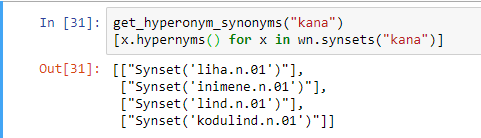

Aga grupid andsid päris hea ülevaate tekstist ning sisu kokkuvõtte saaks nendest järeldada.

Grupid on kujul: grupi nimi - elemendid: element1 (kordade arv), ...

